In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
#Me quedo solo con las columnas que se indican

df = df[['Latitude','Longitude','MedInc']]
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [4]:
from sklearn.model_selection import train_test_split
# Al ser un modelo no supervisado no necesitamos y_train/test
X_train, X_test= train_test_split(df, test_size = 0.2, random_state = 42)

Implementación k-mean

In [5]:
import numpy as np
from sklearn.cluster import KMeans

# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

X_train['cluster'] = model.labels_ #Almacena las etiquetas de cluster


In [6]:
X_train.head() #De este modo solo tenemos el valor de cluster para los datos de entrenamiento

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


In [7]:
X_train['cluster'].dtype

dtype('int32')

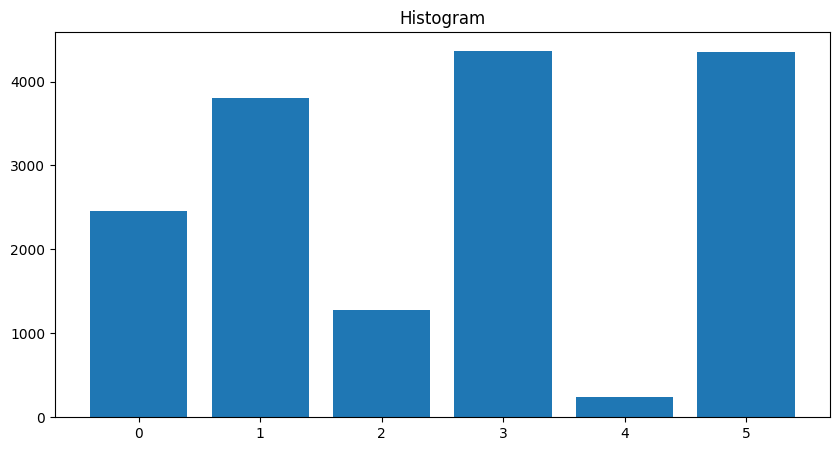

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))

unique, counts = np.unique(X_train['cluster'], return_counts=True)
plt.bar(unique, counts)

plt.title("Histogram")
plt.show()

Se que este no es un gráfico de puntos pero creo que se ve mejor así, intenté hacer uno como el de los apuntes de clase pero no se indica que es el eje X y el eje Y y es más confuso.

In [9]:
prediction = model.predict(X_test)
X_test['cluster'] = prediction

In [10]:
#Ahora hay que combinar los datos del entrenamiento con los del test

total_df = pd.concat([X_test, X_train], axis=0)

total_df

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5
...,...,...,...,...
11284,33.78,-117.96,6.3700,2
11964,34.02,-117.43,3.0500,3
5390,34.03,-118.38,2.9344,3
860,37.58,-121.96,5.7192,0


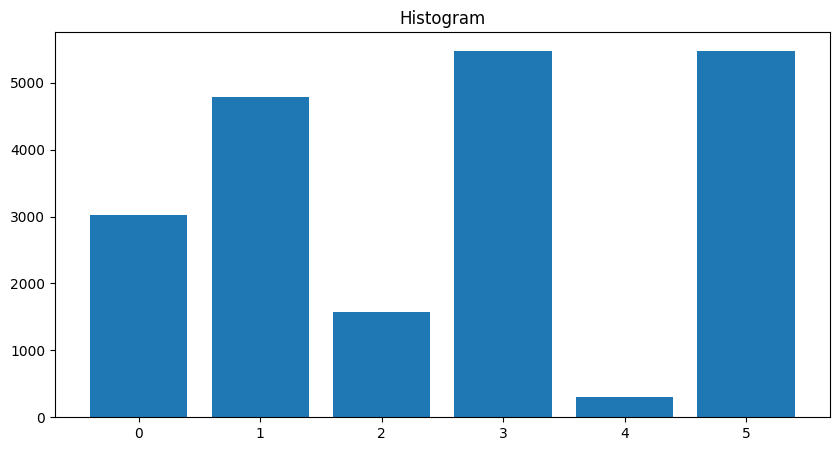

In [11]:
plt.figure(figsize = (10, 5))

unique, counts = np.unique(total_df['cluster'], return_counts=True)
plt.bar(unique, counts)

plt.title("Histogram")
plt.show()

El gráfico parece idéntico al anterior, lo que asumiendo que nuestros datos de testeo eran representativos significa que las predicciones están bien ya que se conservan las proporciones con los datos de entrenamiento

# Entrenamiento del modelo Supervisado

In [17]:
#Random Forest

from sklearn.model_selection import train_test_split

num_variables = ['Latitude', 'Longitude', 'MedInc']

X = total_df.drop('cluster', axis = 1)[num_variables]
y = total_df["cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) #Usar la escala del training tanto para el training como para el test

X_train_norm = scaler.transform(X_train) 
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables) #Convertir los datos de nuevo en dataframe

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9953972868217055

Me parece un rendimiento incluso sospechosamente alto, si fuese de 1 asumiría que se trata de un error, pero en este caso tal vez sea porque el modelo es sencillo, aunque habíendo entrenado un modelo supervisado a partir de uno no supervisado esperaba ver un error mayor (el acumulado en cada modelo).